In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#**Task-3 : CREDIT CARD FRAUD DETECTION**
#Codsoft Internship

#Name: Falguni Gujar


#Domain : Data Science

##Build a machine learning model to identify fraudulent credit card transactions. Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
##Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
##Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.
##Here's a high-level overview of what you can do:
##Data Collection:

##Gather a comprehensive dataset containing historical credit card transactions. This dataset should include features like transaction amount, time,V1 .. V28 and whether the transaction was fraudulent or not i.e Class.
##Data Preprocessing:

##Handle missing data, outliers, and duplicate records.
##Encode categorical variables and normalize numerical features.
##Split the data into training and testing sets to evaluate model performance.
##Exploratory Data Analysis (EDA):

##1. Visualize the data to understand its distribution and characteristics.
##Identify patterns, trends, and potential anomalies in legitimate and fraudulent transactions.
##Model Selection:

##2. Choose appropriate machine learning algorithms for fraud detection. Common choices include:
##Logistic Regression
##Decision Trees
##Random Forest ✅
##Support Vector Machines
##Model Training:

##3. Train the selected models on the training data.
##Implement techniques to handle class imbalance (fraudulent transactions are often rare compared to legitimate ones).
##Model Evaluation:

##4. Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
##Consider the business impact of false positives and false negatives in your evaluation.






#**1. Data Collection**

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Load and read the data**

In [ ]:
credit_data = pd.read_csv('/content/creditcard.csv')
credit_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148631,90089,-1.271847,-0.305529,1.050016,-0.229606,2.046442,-1.644978,0.464360,-0.548854,1.143381,...,-0.383113,-0.764455,-0.057428,-0.135694,-0.317524,0.097388,-0.280328,0.064209,1.98,0.0
148632,90090,0.009990,0.933721,0.376333,-0.402222,0.624493,-1.008371,0.931018,-0.301122,1.185722,...,-0.407501,-0.752287,0.083183,-0.167183,-0.472779,0.107175,0.218993,0.091998,9.49,0.0
148633,90091,1.942382,-0.522871,-0.218608,0.497250,-0.605545,0.216448,-1.025009,0.216530,2.516906,...,0.047207,0.458041,0.227490,0.657071,-0.389284,0.484869,-0.062182,-0.059616,11.50,0.0
148634,90092,2.108337,0.303093,-1.778367,0.476308,0.860514,-0.413843,0.119543,-0.300118,1.697379,...,-0.536552,-1.145530,0.280324,-0.109267,-0.196132,0.169877,-0.081930,-0.041328,1.98,0.0
148635,90092,-0.586132,1.313117,0.162028,0.670527,1.115916,-1.099998,1.422821,-0.413658,0.748708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_data.shape

(148636, 31)

In [ ]:
# informtion of dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148636 entries, 0 to 148635
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    148636 non-null  int64  
 1   V1      148636 non-null  float64
 2   V2      148636 non-null  float64
 3   V3      148636 non-null  float64
 4   V4      148636 non-null  float64
 5   V5      148636 non-null  float64
 6   V6      148636 non-null  float64
 7   V7      148636 non-null  float64
 8   V8      148636 non-null  float64
 9   V9      148636 non-null  float64
 10  V10     148636 non-null  float64
 11  V11     148636 non-null  float64
 12  V12     148636 non-null  float64
 13  V13     148636 non-null  float64
 14  V14     148636 non-null  float64
 15  V15     148636 non-null  float64
 16  V16     148636 non-null  float64
 17  V17     148636 non-null  float64
 18  V18     148635 non-null  float64
 19  V19     148635 non-null  float64
 20  V20     148635 non-null  float64
 21  V21     14

#**2. Data Processing**

In [ ]:
# Check null values
credit_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#fill null values
credit_data[credit_data.isnull().any(axis=1)]



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148635,90092,-0.586132,1.313117,0.162028,0.670527,1.115916,-1.099998,1.422821,-0.413658,0.748708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_data.dropna(inplace=True)


In [ ]:
credit_data.fillna(credit_data.mean(), inplace=True)


In [ ]:
credit_data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,...,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000
mean,53855.750140,-0.247183,0.034884,0.638576,0.126538,-0.260135,0.072824,-0.106482,0.061004,-0.082015,...,-0.037408,-0.113890,-0.030613,0.012426,0.124313,0.022345,0.002148,0.002733,89.523893,0.001917
std,21795.683007,1.819464,1.612613,1.284395,1.336267,1.309291,1.286681,1.164119,1.233228,1.090519,...,0.725866,0.640886,0.586874,0.595904,0.442000,0.491788,0.389262,0.313032,243.891996,0.043747
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38829.000000,-1.026864,-0.549894,0.137498,-0.729636,-0.890033,-0.671181,-0.598879,-0.135341,-0.707006,...,-0.227308,-0.550560,-0.171156,-0.325890,-0.146171,-0.326527,-0.060753,-0.006071,5.760000,0.000000
50%,55514.000000,-0.273862,0.114310,0.728767,0.153278,-0.297300,-0.185193,-0.055040,0.078122,-0.145831,...,-0.059346,-0.092855,-0.043604,0.067927,0.161625,-0.061666,0.012123,0.023391,22.900000,0.000000
75%,72241.000000,1.159979,0.795397,1.349962,0.980066,0.265224,0.459364,0.423676,0.375111,0.496412,...,0.115947,0.308892,0.085543,0.410056,0.416348,0.286453,0.089508,0.077867,79.860000,0.000000
max,90092.000000,2.401777,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


#**3. EDA(Exploratory Data Analysis)**

In [ ]:
# Number of columns
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Unique value in class columns
credit_data.Class.unique()

array([0., 1.])

###**Class Columns has two values i.e 0 & 1 where 1 is Fraud Case and 0 is Valid case.**
###**Determine Number of fraud cases in the dataset**

##*No of FraudCase/No of ValidCase*

In [ ]:
fraud_case = credit_data[credit_data['Class'] == 1]
valid_case = credit_data[credit_data['Class'] == 0]

print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")

total =  len(fraud_case) / len(valid_case)
total

Number of Fraud Case: 285
Number of Valid Case: 148350


0.0019211324570273002

##In precentage
(No of FraudCase/Total)*100

In [ ]:
per = len(fraud_case) / len(credit_data['Class']) * 100
per

0.19174487839337975

Only 0.19% transaction is fraudlent

##Class Distrubtion

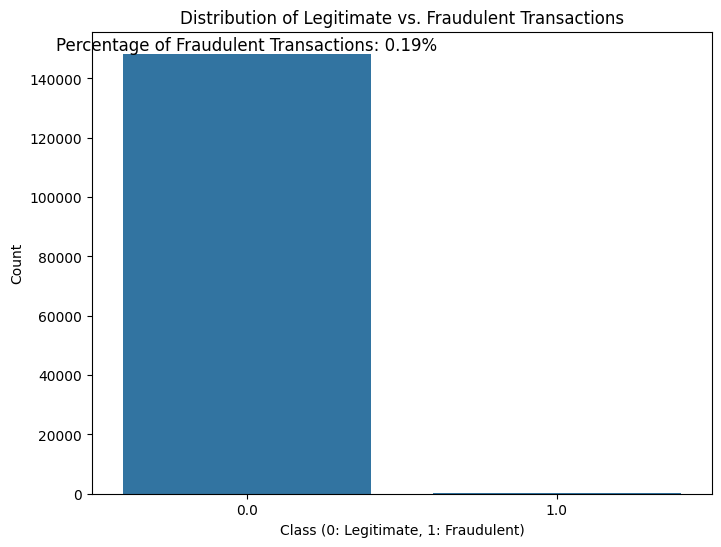

In [ ]:
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_data['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')

plt.show()

##Time Analysis

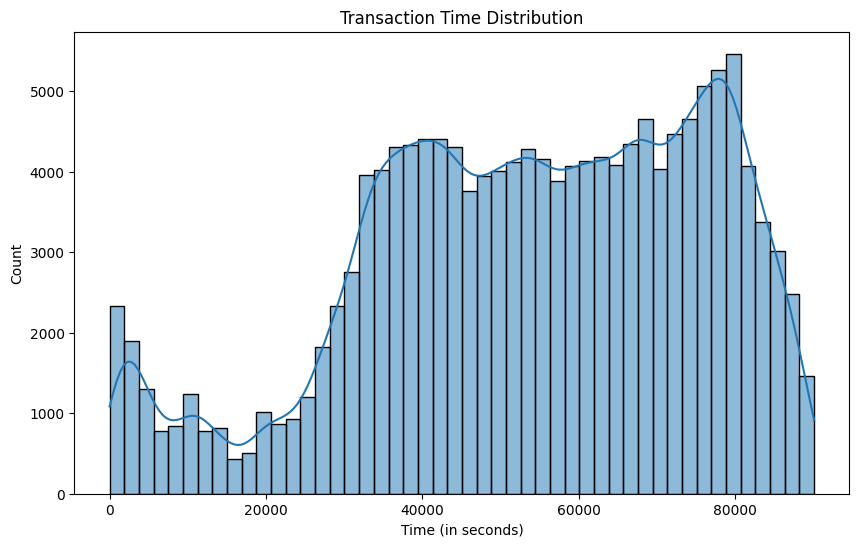

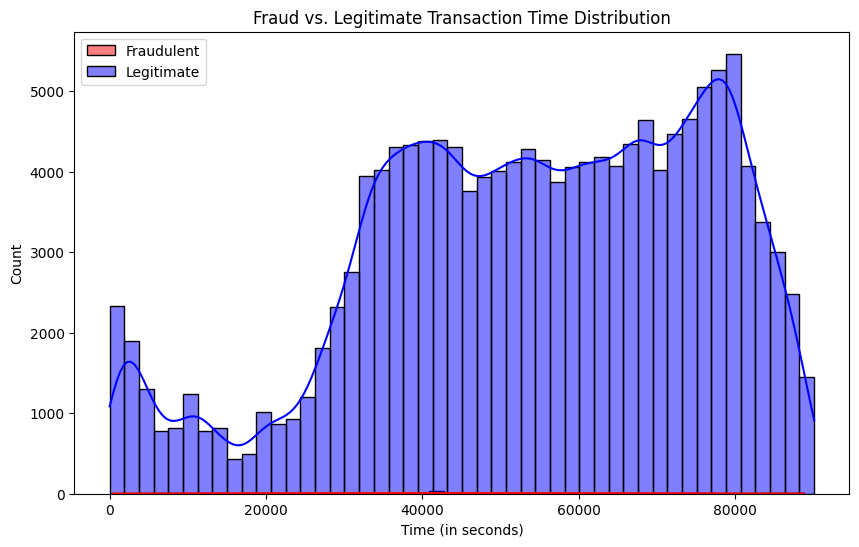

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Time'], bins=48, kde=True)  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')

# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()

plt.show()

##Transaction Amount Analysis

In [ ]:
# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)
print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)

Summary Statistics for Legitimate Transactions:
count    148350.000000
mean         89.463119
std         243.886404
min           0.000000
25%           5.810000
50%          22.900000
75%          79.665000
max       19656.530000
Name: Amount, dtype: float64

Summary Statistics for Fraudulent Transactions:
count     285.000000
mean      121.158526
std       245.176141
min         0.000000
25%         1.000000
50%         9.990000
75%       105.990000
max      1809.680000
Name: Amount, dtype: float64


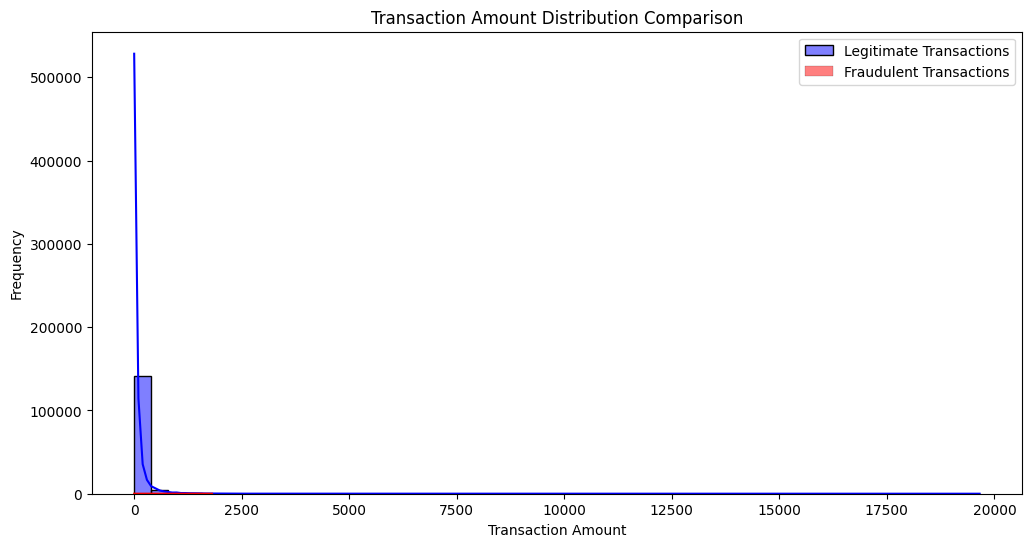

In [ ]:
# Separate data for legitimate and fraudulent transactions
legitimate_transactions = credit_data[credit_data['Class'] == 0]['Amount']
fraudulent_transactions = credit_data[credit_data['Class'] == 1]['Amount']

plt.figure(figsize=(12, 6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='Legitimate Transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='Fraudulent Transactions', bins=50)

plt.title('Transaction Amount Distribution Comparison')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

##Feature Correlation

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.002592  0.019241 -0.065544 -0.045971  0.002193 -0.024945   
V1      0.002592  1.000000 -0.005435  0.186395 -0.038488  0.005706  0.051544   
V2      0.019241 -0.005435  1.000000 -0.100484  0.026201 -0.036373  0.012533   
V3     -0.065544  0.186395 -0.100484  1.000000 -0.047946  0.140189 -0.072798   
V4     -0.045971 -0.038488  0.026201 -0.047946  1.000000  0.004541 -0.031749   
V5      0.002193  0.005706 -0.036373  0.140189  0.004541  1.000000  0.061958   
V6     -0.024945  0.051544  0.012533 -0.072798 -0.031749  0.061958  1.000000   
V7      0.010509  0.077740 -0.011206  0.166508 -0.008772 -0.018015  0.014709   
V8      0.011534 -0.013035  0.003866 -0.098023  0.027075 -0.017130 -0.041622   
V9     -0.165987 -0.057769  0.007776  0.081084  0.023981  0.021147  0.032578   
V10     0.037824 -0.024501  0.039670  0.053562 -0.073701  0.041691 -0.018389   
V11    -0.152816  0.014306  0.021694 -0.

<ipython-input-32-287aac974b56>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')


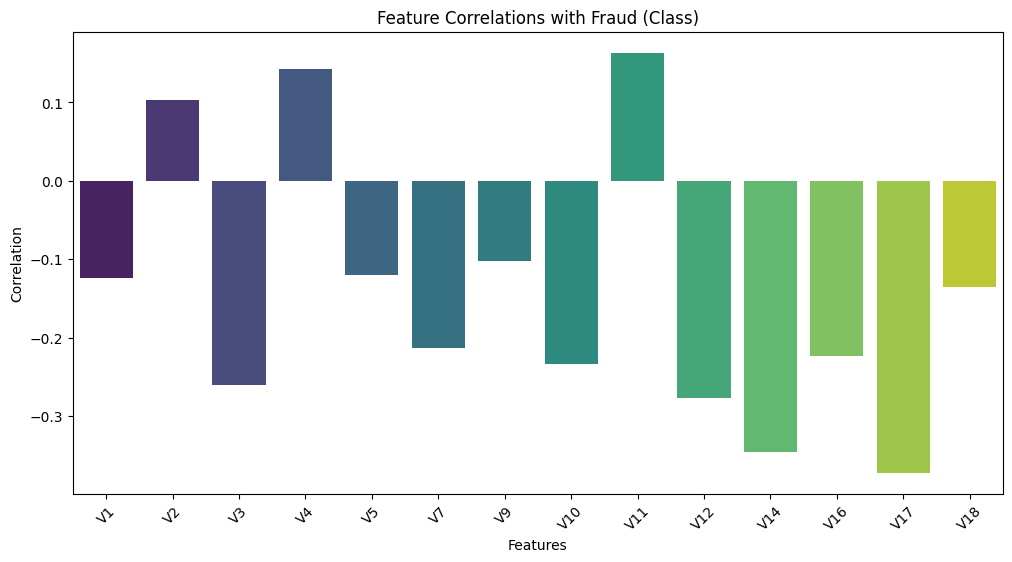

In [ ]:
# Calculate the correlation matrix
correlation_matrix = credit_data.corr()
print(correlation_matrix)

# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1

highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

plt.figure(figsize=(12, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

plt.show()

##**Transaction Amount vs. Time:**
* Plot a scatter plot to examine the relationship between transaction amount and time.

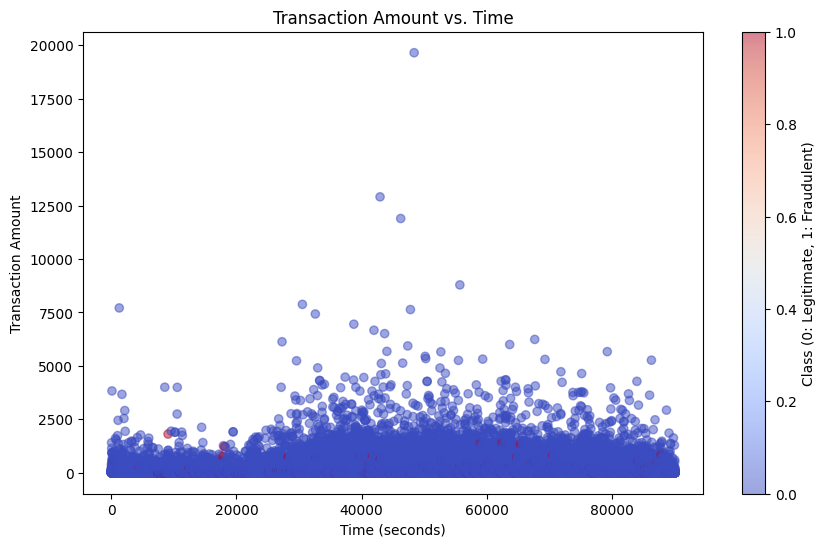

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Time'], credit_data['Amount'], c=credit_data['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')

plt.show()

##Visualize Heatmap for correlation matrix between features.

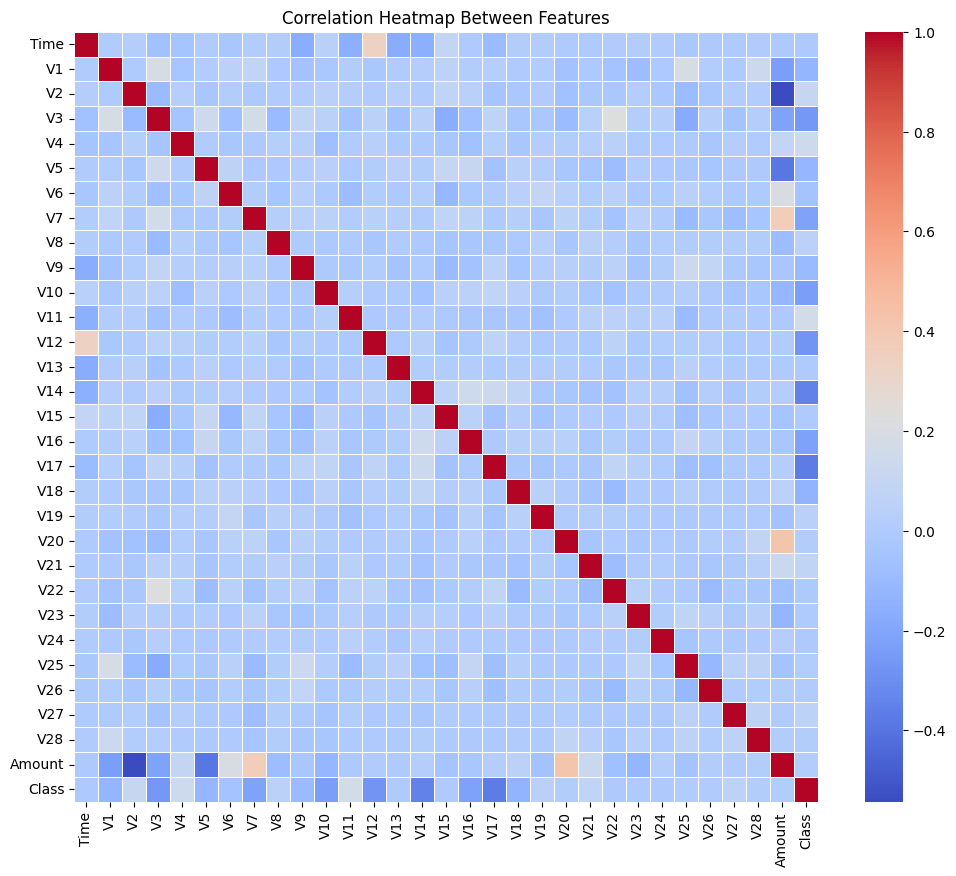

In [ ]:
correlation_matrix = credit_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

##**4. Developing Model**

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

**Defined X and Y**

In [ ]:
# Test value
X = credit_data.drop(['Class'], axis=1)
# Target value
Y = credit_data['Class']

print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 9.00900000e+04,  9.99031296e-03,  9.33720798e-01, ...,
         2.18993459e-01,  9.19979553e-02,  9.49000000e+00],
       [ 9.00910000e+04,  1.94238153e+00, -5.22871098e-01, ...,
        -6.21817399e-02, -5.96156829e-02,  1.15000000e+01],
       [ 9.00920000e+04,  2.10833681e+00,  3.03093324e-01, ...,
        -8.19300930e-02, -4.13277280e-02,  1.98000000e+00]]), (148635, 30))
value and shapes : (array([0., 0., 0., ..., 0., 0., 0.]), (148635,))


**Spliting the data for training and Testing|**

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

**Building Model**

* Random Forest is a popular choice for fraud detection because it can handle imbalanced datasets and capture complex relationships between features. We can further tune hyperparameters or explore feature importance to enhance the model's performance and interpretability.

In [ ]:
model = RandomForestClassifier(n_estimators=10, random_state=42)


In [ ]:
X_train_sample = X_train.sample(frac=0.3, random_state=42)
Y_train_sample = Y_train.loc[X_train_sample.index]
model.fit(X_train_sample, Y_train_sample)


RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
print(X_train.isnull().sum())
print(Y_train.value_counts())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64
Class
0.0    118688
1.0       220
Name: count, dtype: int64


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)


In [ ]:
print(y_pred)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
10767     0.0
123265    0.0
28089     0.0
28203     0.0
122673    0.0
         ... 
145392    0.0
22693     0.0
93018     0.0
138788    0.0
91925     0.0
Name: Class, Length: 29727, dtype: float64


#**6. Model Evaluation**

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))

Confusion Matrix:
 [[29661     1]
 [   11    54]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29662
         1.0       0.98      0.83      0.90        65

    accuracy                           1.00     29727
   macro avg       0.99      0.92      0.95     29727
weighted avg       1.00      1.00      1.00     29727


Accuracy Score: 0.9995963265718034


#**Complete Task**